In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('dataset.txt')

In [9]:
print(df.head())

  customer_id   age  gender product_category  quantity   price
0           1  35.0    Male         Clothing       2.0   50.99
1           2  28.0  Female      Electronics       1.0  299.99
2           3  45.0    Male       Home Decor       3.0   25.99
3           4  52.0  Female         Clothing       2.0   59.99
4           5  30.0    Male      Electronics       1.0  499.99


In [10]:
print(df.describe())

              age    quantity       price
count  300.000000  300.000000  300.000000
mean    34.720000    1.796667   66.420000
std      6.232529    0.746445  103.362976
min     23.000000    1.000000    0.990000
25%     31.000000    1.000000    5.990000
50%     34.000000    2.000000   23.990000
75%     40.000000    2.000000   58.490000
max     52.000000    3.000000  599.990000


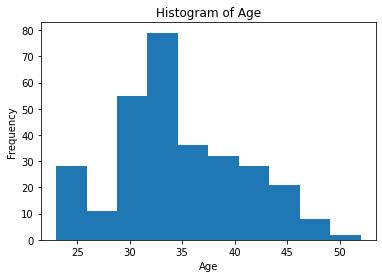

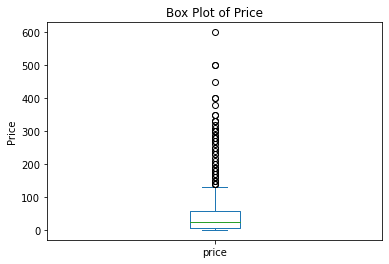

In [15]:
# Histogram
df['age'].plot.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Box plot
df['price'].plot.box()
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

In [16]:
print('Mean Age:', df['age'].mean())
print('Median Quantity:', df['quantity'].median())
print('Standard Deviation of Price:', df['price'].std())

Mean Age: 34.72
Median Quantity: 2.0
Standard Deviation of Price: 103.36297587922236


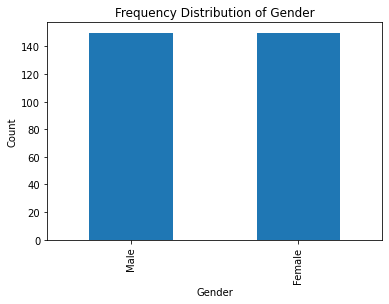

In [17]:
# Bar plot
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Frequency Distribution of Gender')
plt.show()

In [21]:
mode_gender = df['gender'].mode()[0]
percentage_product_category = df['product_category'].value_counts(normalize=True)*100

print('Mode of Gender:', mode_gender)
print('Percentage of Product Categories:')
print(percentage_product_category)

Mode of Gender: Female
Percentage of Product Categories:
Clothing       40.0
Electronics    30.0
Home Decor     30.0
Name: product_category, dtype: float64


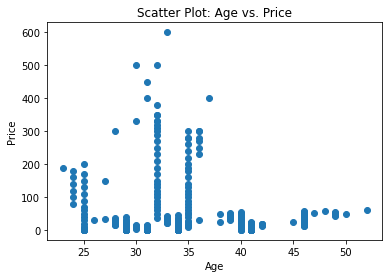

In [22]:
plt.scatter(df['age'], df['price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Scatter Plot: Age vs. Price')
plt.show()

In [23]:
correlation = df['age'].corr(df['price'])
print('Correlation between Age and Price:', correlation)

Correlation between Age and Price: -0.1490080943312372


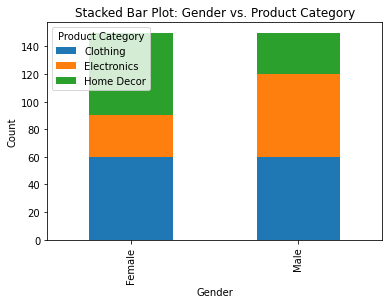

In [24]:
crosstab = pd.crosstab(df['gender'], df['product_category'])
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Gender vs. Product Category')
plt.legend(title='Product Category')
plt.show()

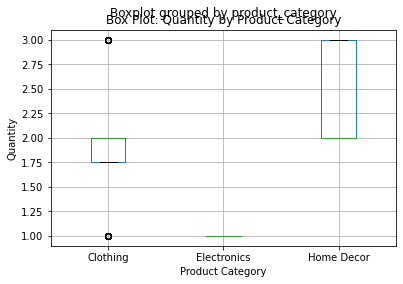

In [25]:
df.boxplot(column='quantity', by='product_category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.title('Box Plot: Quantity by Product Category')
plt.show()

In [26]:
summary_stats = df.groupby('product_category')['quantity'].describe()
print('Summary Statistics for Quantity by Product Category:')
print(summary_stats)

Summary Statistics for Quantity by Product Category:
                  count      mean       std  min   25%  50%  75%  max
product_category                                                     
Clothing          120.0  1.991667  0.704080  1.0  1.75  2.0  2.0  3.0
Electronics        90.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0
Home Decor         90.0  2.333333  0.474045  2.0  2.00  2.0  3.0  3.0


In [27]:
duplicate_rows = df.duplicated()
print('Number of duplicate rows:', duplicate_rows.sum())

Number of duplicate rows: 3


In [28]:
df_cleaned = df.drop_duplicates()

In [29]:
missing_values = df.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
customer_id         0
age                 4
gender              4
product_category    4
quantity            4
price               4
dtype: int64


In [30]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['quantity'].fillna(df['quantity'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

In [31]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['product_category'].fillna(df['product_category'].mode()[0], inplace=True)

In [34]:
correlation_matrix = df.corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
               age  quantity     price
age       1.000000  0.373769 -0.149008
quantity  0.373769  1.000000 -0.501697
price    -0.149008 -0.501697  1.000000


The correlation coefficient between "age" and "quantity" is 0.373769. This positive correlation suggests a moderate association between age and quantity. It indicates that, on average, as the age of the customer increases, the quantity of the purchased product also tends to increase.

The correlation coefficient between "age" and "price" is -0.149008. This negative correlation indicates a weak association between age and price. It suggests that there is a slight tendency for younger customers to purchase higher-priced products, while older customers may opt for lower-priced products.

The correlation coefficient between "quantity" and "price" is -0.501697. This negative correlation indicates a moderate association between quantity and price. It suggests that, on average, as the quantity of the purchased product increases, the price tends to decrease. This relationship could indicate possible bulk discounts or pricing strategies.